In [24]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from daio.h5 import lazyh5
import os, pathlib, glob
import json
import h5py
cmap = "gray"

In [25]:
# pn_rec = r"Y:/hpc/r/lfm2025/recordings"
pn_rec = r"~/hpc-r/lfm2025/recordings"
includes = ['bg']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_rec, '*'))), reverse=True) if os.path.exists(os.path.join(pn_rec, rec, 'data.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250730_1553_LB_25x_5fps_bg
20250729_1605_LB_DC8_5dpf_backfill_bg_2
20250729_1603_LB_DC8_5dpf_backfill_bg
20250729_1600_LB_DC8_5dpf_backfill_bg_2fps
20250729_1233_LB_DC4_5dpf_backfill_bg_2fps
20250729_1229_LB_DC4_5dpf_backfill_bg_40fps
20250729_1200_LB_DC1_5dpf_backfill_bg_wap_40fps
20250729_1158_LB_DC1_5dpf_backfill_bg_wap_5fps
20250729_1146_LB_DC1_5dpf_backfill_1_bg
20250701_1654_LB_bg_2fps
20250701_1651_LB_bg_40fps
20250701_1649_LB_bg_80fps
20250611_1508_LB_80fps_100laser_bg
20250611_1508_LB_40fps_100laser_bg
20250610_1904_LB_30k_wo_coverslip_1_bg
20250602_1753_LB_bg_200s
20250602_1749_LB_bg_100s


In [26]:
dataset_name = "20250730_1553_LB_25x_5fps_bg"
url_home = "/home/lubo12/"
pn_out = "~/hpc-rw/lfm/bg"



In [27]:
fn = str(pathlib.Path(pn_rec, dataset_name).expanduser())
bg = lazyh5(os.path.join(fn, 'data.h5'))
fps = json.load(open(os.path.join(fn, 'meta.json')))["acquisition"]["fps"]
led_pwr = json.load(open(os.path.join(fn, 'meta.json')))["acquisition"]["led_percent"]


Processing 70 frames in chunks of 31


Calculating running mean:   0%|          | 0/3 [00:00<?, ?it/s]

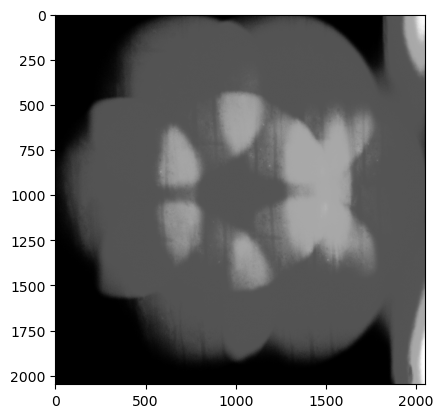

In [28]:
from util import calculate_running_mean
bg_mean = calculate_running_mean(bg["data"], dtype = cp.float64)
plt.imshow(bg_mean, cmap = "gray")

In [29]:
np.save(os.path.expanduser(os.path.join(pn_out,dataset_name))+".npy",bg_mean)

In [30]:
with h5py.File(os.path.expanduser(os.path.join(pn_out,dataset_name))+".h5", "w") as f:
    f["data"] = bg_mean
    f["fps"] = fps
    f["led_percent"] = led_pwr